In [ ]:
import numpy as np
import pandas as pd

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

from sklearn.cluster import KMeans

import seaborn as sns

# Import data

In [ ]:
df = pd.read_csv('/content/Iris_new.csv', index_col=False)

In [ ]:
label = df['Label'].to_numpy()
del df['Label']

In [ ]:
X = df.to_numpy()

# Dendrogram

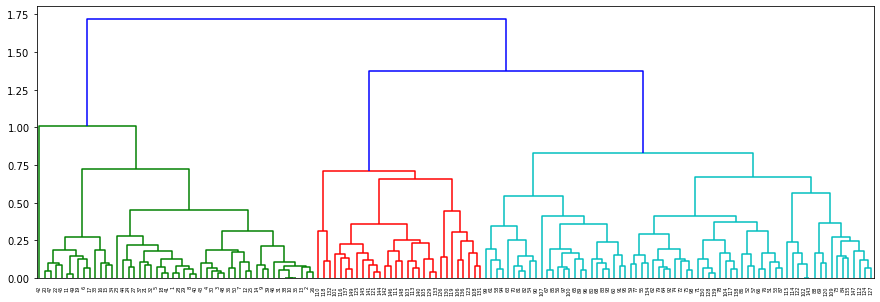

In [ ]:
linked = linkage(X, 'complete')

labelList = range(1, 151)

plt.figure(figsize=(15, 5))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

# Độ đo đánh giá

## SSE

- **Ý tưởng:** Tính khoảng cách từ một điểm dữ liệu đến tâm cụm của điểm dữ liệu đó.
- **Mục đích:** Đánh giá *tính gắn kết* trong không gian n chiều (n là số đặc trưng) của các điểm dữ liệu trong cùng một cụm:
  - SSE càng nhỏ thì các điểm dữ liệu trong một cụm càng gắn kết.
  - SSE càng lớn thì các điểm dữ liệu trong một cụm càng kém gắn kết.

In [ ]:
def splitK_cluster(X, pred, k):
  X_k = {}

  for i in range(0, k):
    X_k[i] = []
  
  for i in range(0, len(pred)):
    X_k[pred[i]].append(X[i])

  return X_k

In [ ]:
def calSSE(X, pred, k):

  # Split k cluster
  X_k = splitK_cluster(X, pred, k)

  # Center of each cluster
  center_k = {}
  for i in range(0, k):
    center_k[i] = sum(X_k[i])/len(X_k[i])

  # Calculate SSE
  sse = 0
  for i in range(0, len(X_k)):
    for j in range(0, len(X_k[i])):
      sse += sum((X_k[i][j] - center_k[i])**2)
      
  return sse

## BSS

- **Ý tưởng:** Tính khoảng cách từ giữa các tâm cụm với nhau.
- **Mục đích:** Đánh giá *tính tách biệt* trong không gian n chiều (n là số đặc trưng) giữa các cụm:
  - BSS càng nhỏ thì các cụm càng gần nhau.
  - BSS càng lớn thì các cụm càng xa nhau, các cụm càng tách biệt.

In [ ]:
def calBSS(X, pred, k):

  # Split k cluster
  X_k = splitK_cluster(X, pred, k)

  # Center of each cluster
  center_k = {}
  for i in range(0, k):
    center_k[i] = sum(X_k[i])/len(X_k[i])

  # Calculate BSS
  bss = 0
  for i in range(0, k):
    for j in range(0, k):
      if i != j:
        bss += sum((center_k[i] - center_k[j])**2)

  return bss

## Purity

- **Ý tưởng:** (Số lượng đối tượng phân cụm vào đúng lớp thực tế) / (Tổng số lượng đối tượng)
- **Mục đích:** Đánh giá sự chính xác của việc phân cụm: Purity càng lớn thì phân cụm càng chính xác, Purity càng nhỏ thì phân cụm càng sai lệch.

=> Khi sử dụng cùng một giá trị k, phù hợp để so sánh các thuật toán với nhau

In [ ]:
def calPurity(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

# GridSearch Agglomerative Clustering

In [ ]:
n_clusters = 3
linkage = ['ward', 'complete', 'average', 'single']
affinity = ['euclidean', 'manhattan']

In [ ]:
for link in linkage:
  for aff in affinity:
    if link == 'ward':
      if aff == 'manhattan': continue
    agg = AgglomerativeClustering(linkage=link, affinity=aff, n_clusters=3).fit(X)
    print(link + " - " + aff + ":")
    print("\tSSE: " + str(calSSE(X, agg.labels_, 3)))
    print("\tBSS: " + str(calBSS(X, agg.labels_, 3)))
    print("\tPurity: " + str(calPurity(label, agg.labels_)))

ward - euclidean:
	SSE: 8.909311880214469
	BSS: 4.484614507807018
	Purity: 0.8733333333333333
complete - euclidean:
	SSE: 8.917624209384918
	BSS: 4.953030696239566
	Purity: 0.8666666666666667
complete - manhattan:
	SSE: 8.988625823420026
	BSS: 4.042544362073639
	Purity: 0.9
average - euclidean:
	SSE: 13.764314182001867
	BSS: 4.734707290551929
	Purity: 0.6666666666666666
average - manhattan:
	SSE: 9.074582819253733
	BSS: 5.033277962307687
	Purity: 0.8533333333333334
single - euclidean:
	SSE: 13.764314182001867
	BSS: 4.734707290551929
	Purity: 0.6666666666666666
single - manhattan:
	SSE: 13.034926075407444
	BSS: 6.930032211641375
	Purity: 0.68


# KMeans

In [ ]:
algorithm = ['elkan', 'auto', 'full']

In [ ]:
for alg in algorithm:
  km = KMeans(algorithm=alg, n_clusters=3).fit(X)
  print(alg + ":")
  print("\tSSE: " + str(calSSE(X, km.labels_, 3)))
  print("\tBSS: " + str(calBSS(X, km.labels_, 3)))
  print("\tPurity: " + str(calPurity(label, km.labels_)))

elkan:
	SSE: 8.589817743987505
	BSS: 4.336191067638154
	Purity: 0.8666666666666667
auto:
	SSE: 8.589817743987503
	BSS: 4.336191067638154
	Purity: 0.8666666666666667
full:
	SSE: 8.589817743987503
	BSS: 4.336191067638154
	Purity: 0.8666666666666667


# Check time

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 221 µs (started: 2022-05-18 00:14:12 +00:00)


In [ ]:
agg = AgglomerativeClustering(linkage="ward", affinity="euclidean", n_clusters=3).fit(X)

time: 7.62 ms (started: 2022-05-18 00:14:12 +00:00)


In [ ]:
km = KMeans(n_clusters=3).fit(X)

time: 295 ms (started: 2022-05-18 00:14:12 +00:00)


# Visualization

In [ ]:
df['Labels'] = pd.Series(agg.labels_)

time: 4.42 ms (started: 2022-05-18 00:14:12 +00:00)


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


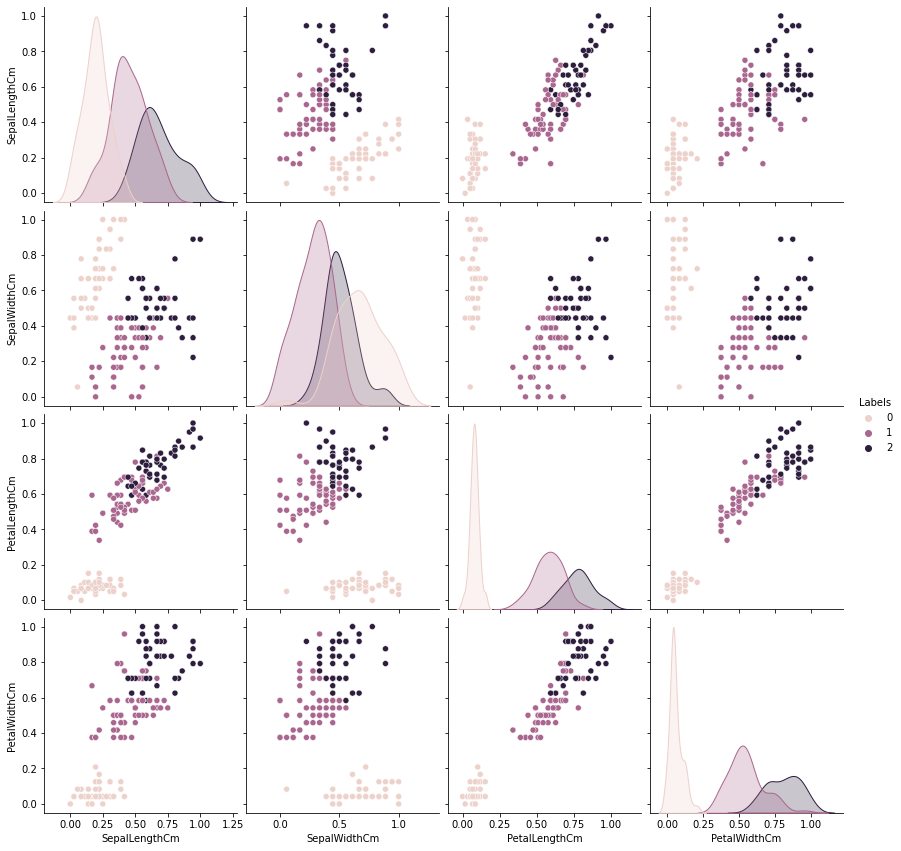

time: 12.2 s (started: 2022-05-18 00:14:12 +00:00)


In [ ]:
sns.pairplot(df, hue="Labels", size=3)